In [1]:
import sys
sys.executable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Chuẩn bị dữ liệu thô

In [2]:
df = pd.read_csv('df.csv')
df.head()

,Continent,Country,Year,Age,Brain and nervous system cancers,Covid-19,Dengue,Drownings,Fires,HIV/AIDS,Leukaemia,Malaria,Natural disasters,Road traffic accidents,Self-inflicted injuries,Tuberculosis,Violence,War
0,Europe,Albania,2000-01-01,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,Europe,Albania,2000-01-01,1-4,0,0,0,12,1,0,3,0,0,0,0,2,0,0
2,Europe,Albania,2000-01-01,15-24,4,0,0,4,2,0,10,0,3,6,11,0,29,0
3,Europe,Albania,2000-01-01,25-34,6,0,0,5,0,0,9,0,1,13,20,0,34,0
4,Europe,Albania,2000-01-01,35-54,33,0,0,4,1,0,18,0,1,15,9,4,35,0


In [3]:
years, number_of_deaths = [], []
for name, group in df[['Year', 'Road traffic accidents']].groupby('Year'):
    years.append(int(name.split('-')[0]))
    number_of_deaths.append(group['Road traffic accidents'].sum())
    
model_df = pd.DataFrame({'Year': years, 'Number of deaths': number_of_deaths})
model_df

,Year,Number of deaths
0,2000,276426
1,2001,265697
2,2002,281112
3,2003,279288
4,2004,267419
5,2005,267593
6,2006,272828
7,2007,278961
8,2008,266743
9,2009,255685


# Khám phá sự phân tán dữ liệu

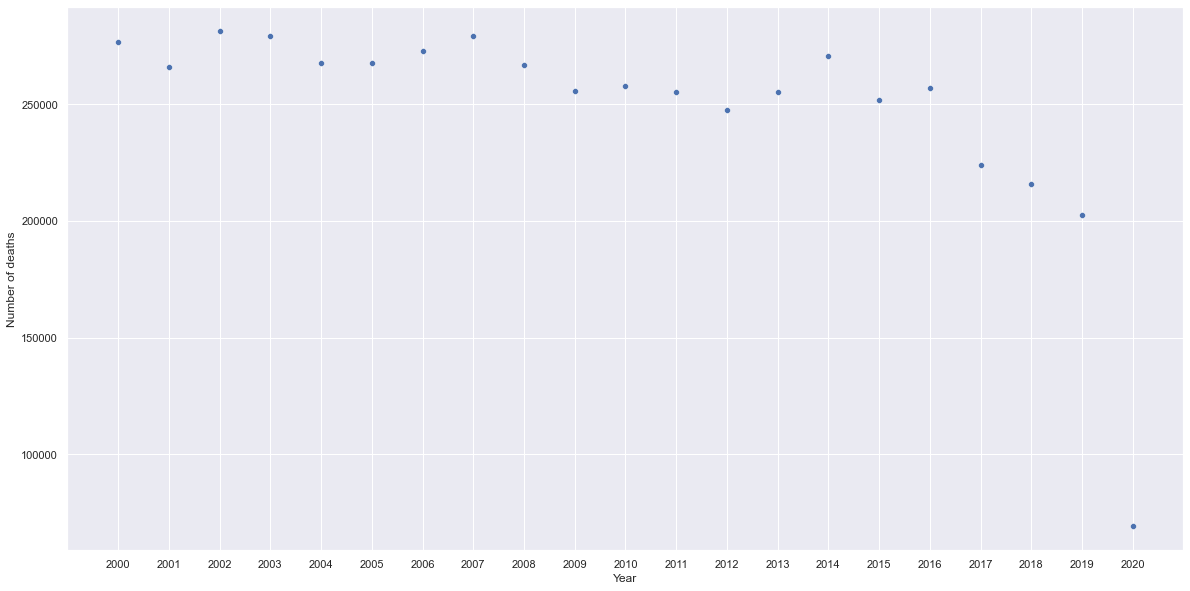

In [4]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x='Year', y='Number of deaths', data=model_df)
plt.xticks(years)
plt.show()

# Chuẩn bị dữ liệu train và test

In [5]:
X = np.array(model_df['Year']).reshape(-1, 1)
y = np.array(model_df['Number of deaths']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Mô hình hồi quy tuyến tính

### Thực hiện mô hình

In [6]:
# Khởi tạo mô hình
line_regr = LinearRegression()

# "Fit" mô hình vào dữ liệu
line_regr.fit(X_train, y_train)

# Xem giá trị của các tham số của mô hình
print('w_1: ', line_regr.coef_) # w_1
print('w_0: ', line_regr.intercept_) # w_0

w_1:  [[-5393.1451406]]
w_0:  [11084992.49975333]


### Trực quan hóa mô hình tìm được

##### Trên tập train

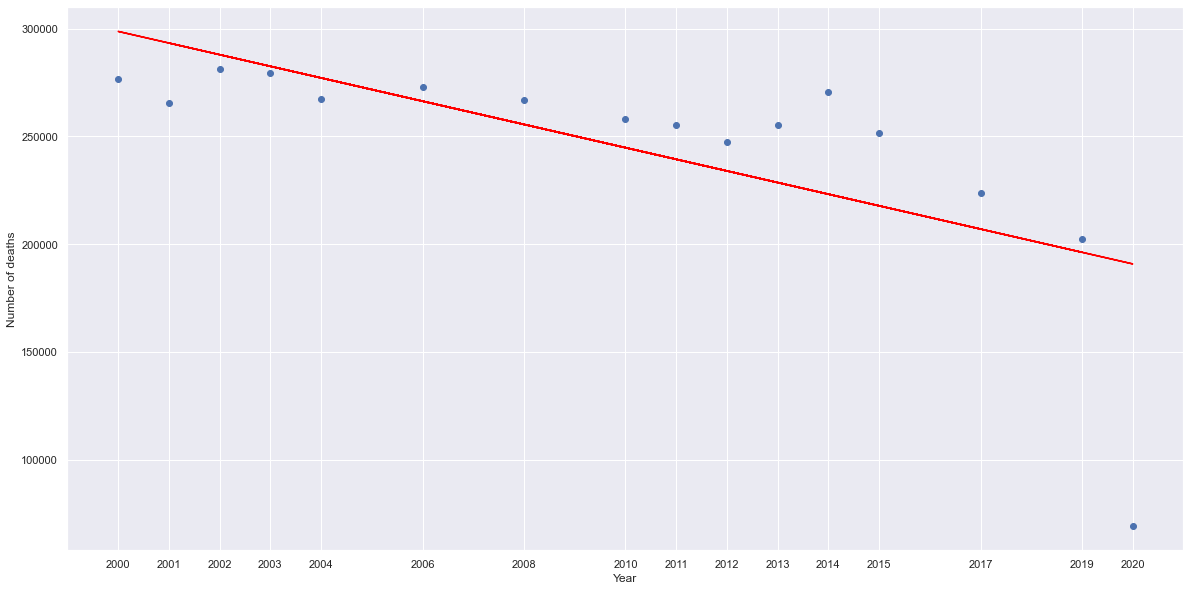

In [7]:
plt.figure(figsize = (20, 10))

plt.scatter(x=X_train, y=y_train)
plt.xticks(X_train)
plt.xlabel('Year')
plt.ylabel('Number of deaths')

plt.plot(X_train, line_regr.predict(X_train), color='red')

plt.show()

##### Trên tập test

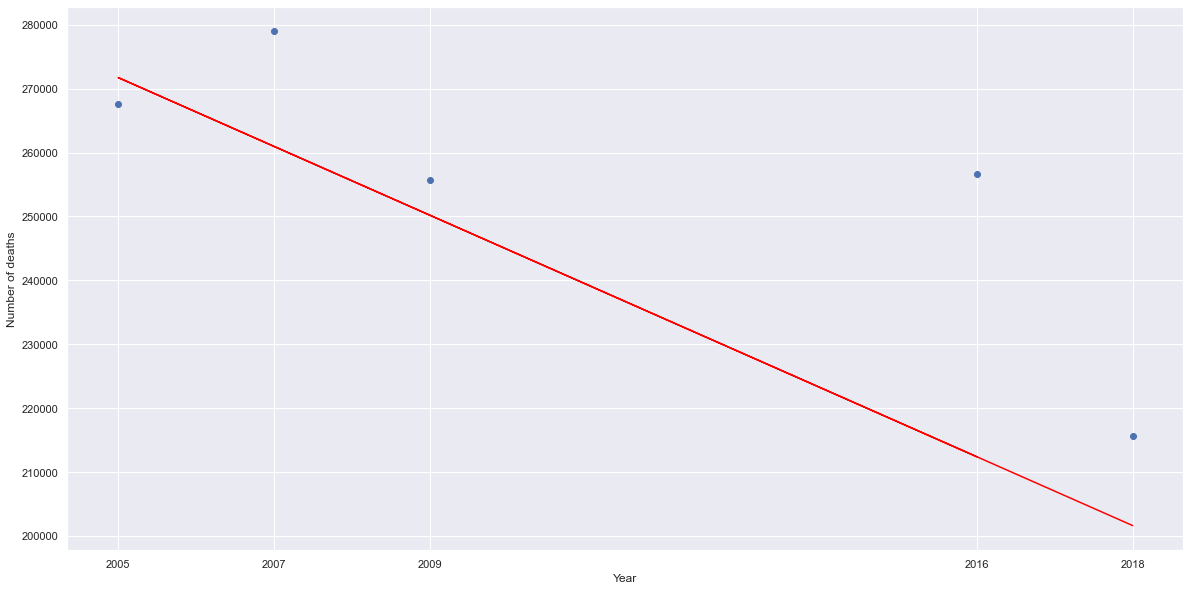

In [8]:
plt.figure(figsize = (20, 10))

plt.scatter(x=X_test, y=y_test)
plt.xticks(X_test)
plt.xlabel('Year')
plt.ylabel('Number of deaths')

plt.plot(X_test, line_regr.predict(X_test), color='red')

plt.show()

### Độ đo đánh giá hồi quy MSE và RMSE

In [9]:
# squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test, y_pred=line_regr.predict(X_test)) # default=True
rmse = mean_squared_error(y_true=y_test, y_pred=line_regr.predict(X_test), squared=False)
  
print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  505601882.31039447
RMSE:  22485.59277204838


nhận xét

# Mô hình hồi quy đa thức

### Xác định đa thức

Chọn đa thức bậc 2, giải thích ...........

y = w_0 + w_1 * x + w_2 * x^2

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=False)

### Tạo mới tập X_train và X_test cho phù hợp với đa thức

In [11]:
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

### Thực hiện mô hình

In [12]:
# Khởi tạo mô hình
poly_regr = LinearRegression()

# "Fit" mô hình vào dữ liệu
poly_regr.fit(poly_X_train, y_train)

# Xem giá trị của các tham số của mô hình
print('w_1, w_2: ', poly_regr.coef_)
print('w_0: ', poly_regr.intercept_)

w_1, w_2:  [[ 2.96616554e+06 -7.39303031e+02]]
w_0:  [-2.97486059e+09]


### Trực quan hóa mô hình tìm được

##### Trên tập train

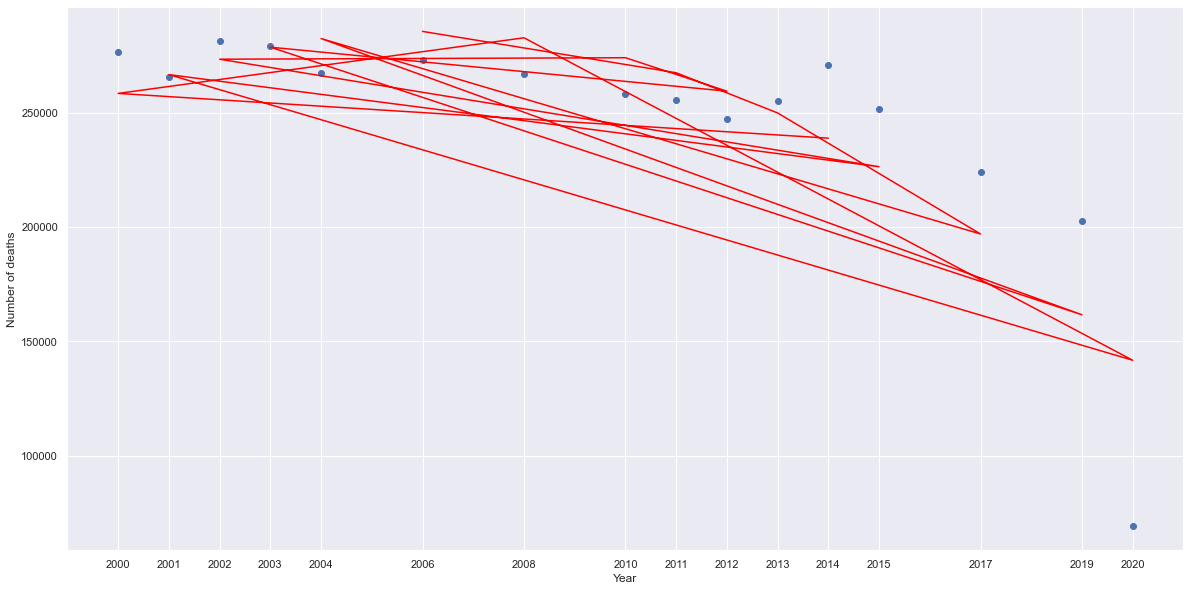

In [13]:
plt.figure(figsize = (20, 10))

plt.scatter(x=X_train, y=y_train)
plt.xticks(X_train)
plt.xlabel('Year')
plt.ylabel('Number of deaths')

plt.plot(X_train, poly_regr.predict(poly_X_train), color='red')

plt.show()

##### Trên tập test

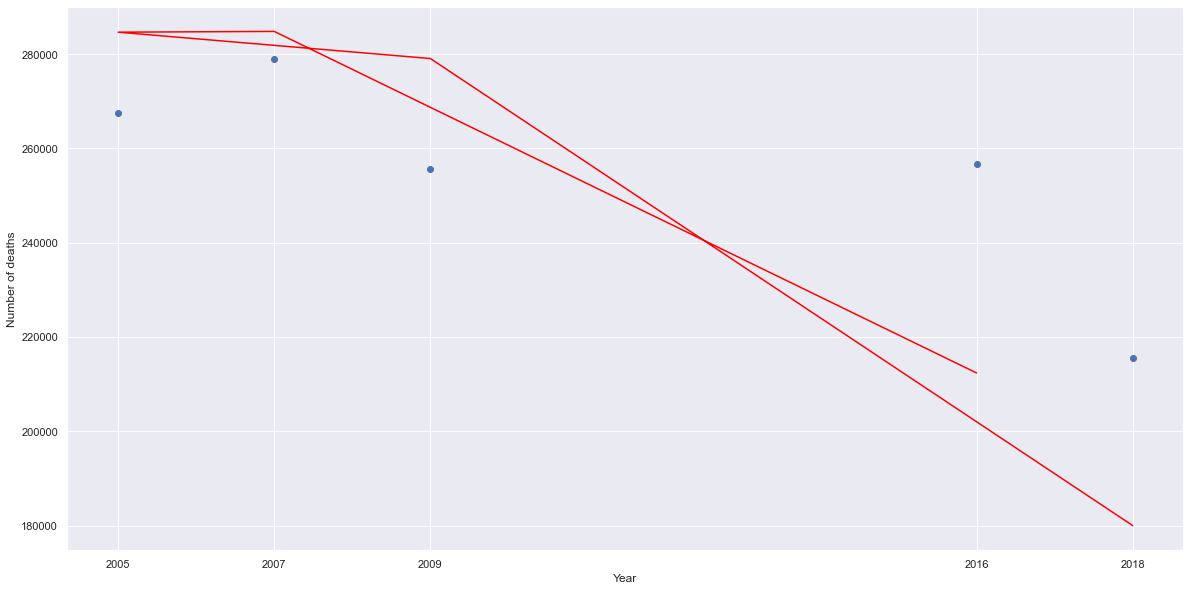

In [14]:
plt.figure(figsize = (20, 10))

plt.scatter(x=X_test, y=y_test)
plt.xticks(X_test)
plt.xlabel('Year')
plt.ylabel('Number of deaths')

plt.plot(X_test, poly_regr.predict(poly_X_test), color='red')

plt.show()

### Độ đo đánh giá hồi quy MSE và RMSE

In [15]:
# squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test, y_pred=poly_regr.predict(poly_X_test)) # default=True
rmse = mean_squared_error(y_true=y_test, y_pred=poly_regr.predict(poly_X_test), squared=False)
  
print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  820833490.4493173
RMSE:  28650.191804756167


nhận xét